<a href="https://colab.research.google.com/github/shell769324/NILBIE/blob/main/FasterRCNN/MMML_Research_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://dl.fbaipublicfiles.com/clevr/CLEVR_v1.0.zip'

In [ ]:
!unzip /content/CLEVR_v1.0.zip


  inflating: CLEVR_v1.0/images/train/CLEVR_train_049107.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_016754.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_043287.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_031265.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_053312.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_009016.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_029544.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_051138.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_062505.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_016352.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_030962.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_037112.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_044518.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_030679.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_027761.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_039810.png  
  infla

In [33]:
!pip install bounding-box

     |████████████████████████████████| 174kB 7.3MB/s 
  Created wheel for bounding-box: filename=bounding_box-0.1.3-cp36-none-any.whl size=163939 sha256=8e405a87bf4eabe650521001b1e9ef3c240e2012002309eda9779fe496b12ee8
  Stored in directory: /root/.cache/pip/wheels/6a/6b/da/71d602e245ef4e78132ddf9b1fe445aca0f834d9216768a818
Successfully built bounding-box


In [39]:
from IPython.display import Image 
import json
import cv2
from bounding_box import bounding_box as bb
import os
from google.colab.patches import cv2_imshow

In [36]:
def show_and_save(title, image, path):
    cv2.imwrite(path, image)
    cv2.imshow(title, image)
    print("Press 'Enter' to display the next picture...")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [26]:
path = 'data/images/train/CLEVR_train_000000.png'

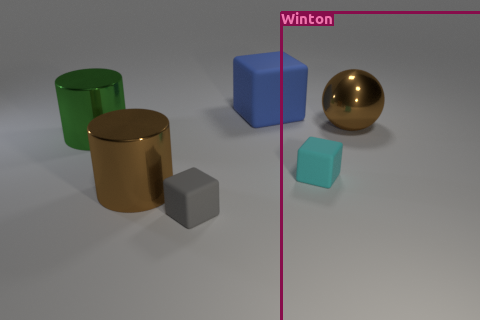

In [42]:
image = cv2.imread(path, cv2.IMREAD_COLOR)
bb.add(image, 281, 12, 744, 431, "Winton", "maroon")
cv2_imshow(image)

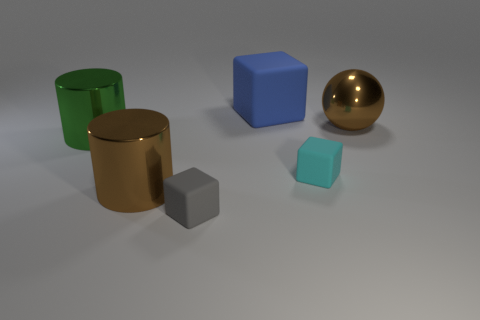

In [27]:
pil_img = Image(path)
display(pil_img)

In [16]:
input_file=open('/content/train_scenes_with_bb.json', 'r')
json_decode=json.load(input_file)


In [29]:
json_decode.keys()

dict_keys(['label_to_ix', 'ix_to_label', 'annotations'])

In [30]:
imgfiles = json_decode['annotations']
imglabels = json_decode['label_to_ix']


In [48]:
print(json_decode['annotations'][0])

{'filename': 'CLEVR_train_000000.png', 'image_id': 0, 'objects': [{'xmin': 227, 'ymin': 46, 'xmax': 309, 'ymax': 128, 'label_id': 12, 'label': 'large blue rubber cube', 'object_id': 0, 'size': 'large', 'color': 'blue', 'material': 'rubber', 'shape': 'cube'}, {'xmin': 60, 'ymin': 62, 'xmax': 124, 'ymax': 157, 'label_id': 23, 'label': 'large green metal cylinder', 'object_id': 1, 'size': 'large', 'color': 'green', 'material': 'metal', 'shape': 'cylinder'}, {'xmin': 291, 'ymin': 135, 'xmax': 344, 'ymax': 187, 'label_id': 84, 'label': 'small cyan rubber cube', 'object_id': 2, 'size': 'small', 'color': 'cyan', 'material': 'rubber', 'shape': 'cube'}, {'xmin': 91, 'ymin': 106, 'xmax': 171, 'ymax': 215, 'label_id': 29, 'label': 'large brown metal cylinder', 'object_id': 3, 'size': 'large', 'color': 'brown', 'material': 'metal', 'shape': 'cylinder'}, {'xmin': 165, 'ymin': 170, 'xmax': 217, 'ymax': 222, 'label_id': 48, 'label': 'small gray rubber cube', 'object_id': 4, 'size': 'small', 'color': 

In [57]:
def addbbx(image,imgdict):
  for objs in imgdict['objects']:
    xmin, ymin, xmax, ymax= objs['xmin'], objs['ymin'], objs['xmax'], objs['ymax'] 
    label = objs['label']
    bb.add(image, xmin, ymin, xmax, ymax, label)
  cv2_imshow(image)


In [61]:
outpath = '/content/result'

CLEVR_train_000000.png


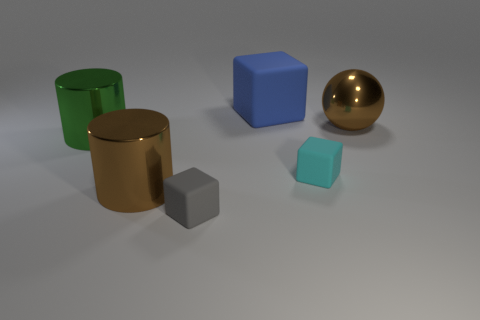

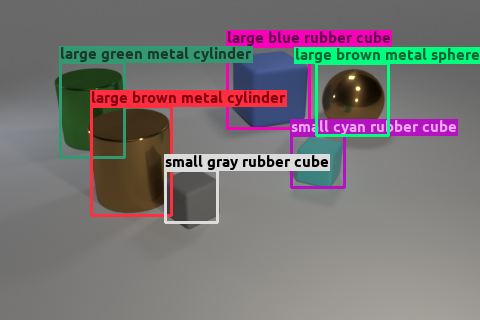

CLEVR_train_000001.png


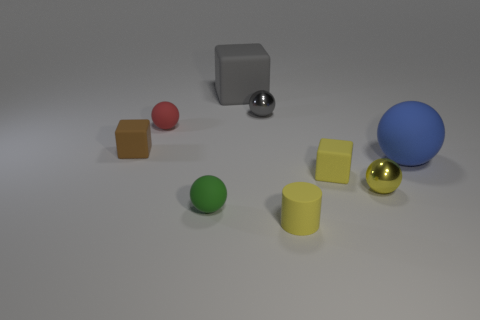

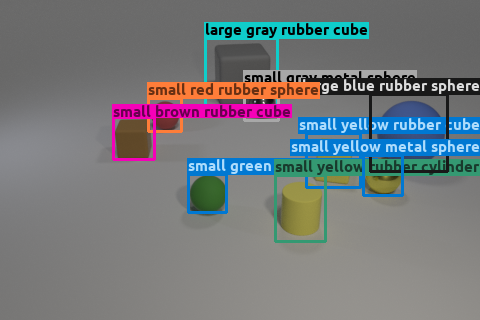

CLEVR_train_000002.png


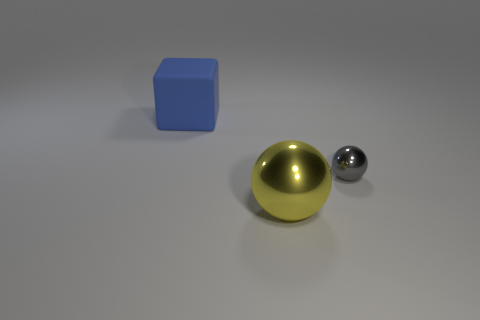

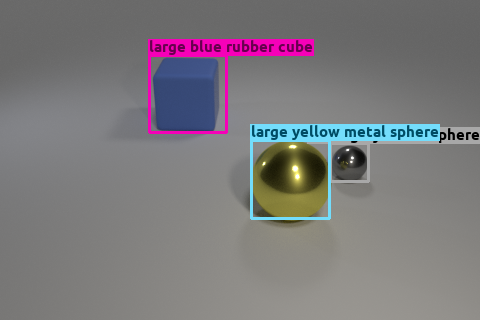

CLEVR_train_000003.png


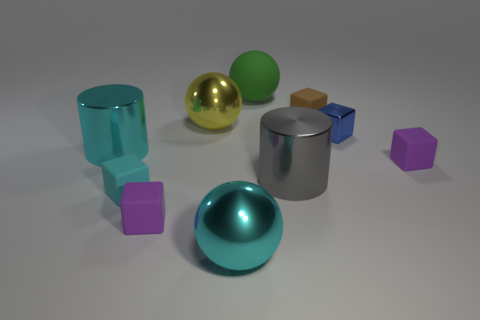

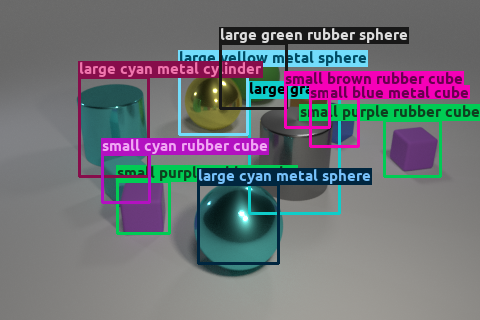

CLEVR_train_000004.png


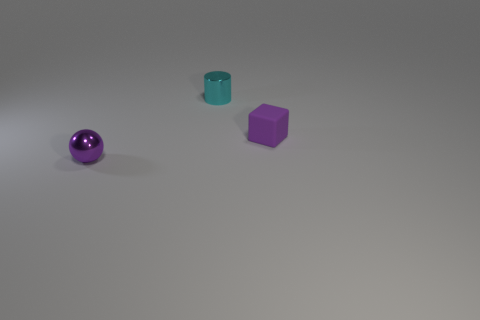

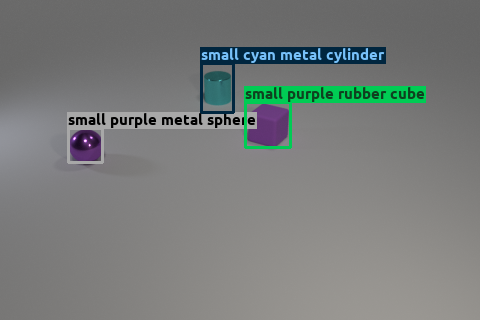

In [65]:
num_imgs  = 5
for i in range(num_imgs):
  dicts = json_decode['annotations'][i]
  filename = dicts['filename']
  print(filename)
  path = 'data/images/train/' + filename 
  image = cv2.imread(path, cv2.IMREAD_COLOR)
  cv2_imshow(image)
  outp = filename
  cv2.imwrite(outp, image)
  addbbx(image,dicts)
  outpo = filename.split('.')[0]+'bbx'+'.png'
  cv2.imwrite(outpo, image)
  
  

In [67]:
print(json_decode['annotations'][0]['objects'])
imgid = 0
imgdict = json_decode['annotations'][imgid]
for objs in imgdict['objects']:
  xmin, ymin, xmax, ymax= objs['xmin'], objs['ymin'], objs['xmax'], objs['ymax'] 
  label = objs['label']
  bb.add(image, 281, 12, 744, 431, label, "maroon")
  

  print(xmin)

[{'xmin': 227, 'ymin': 46, 'xmax': 309, 'ymax': 128, 'label_id': 12, 'label': 'large blue rubber cube', 'object_id': 0, 'size': 'large', 'color': 'blue', 'material': 'rubber', 'shape': 'cube'}, {'xmin': 60, 'ymin': 62, 'xmax': 124, 'ymax': 157, 'label_id': 23, 'label': 'large green metal cylinder', 'object_id': 1, 'size': 'large', 'color': 'green', 'material': 'metal', 'shape': 'cylinder'}, {'xmin': 291, 'ymin': 135, 'xmax': 344, 'ymax': 187, 'label_id': 84, 'label': 'small cyan rubber cube', 'object_id': 2, 'size': 'small', 'color': 'cyan', 'material': 'rubber', 'shape': 'cube'}, {'xmin': 91, 'ymin': 106, 'xmax': 171, 'ymax': 215, 'label_id': 29, 'label': 'large brown metal cylinder', 'object_id': 3, 'size': 'large', 'color': 'brown', 'material': 'metal', 'shape': 'cylinder'}, {'xmin': 165, 'ymin': 170, 'xmax': 217, 'ymax': 222, 'label_id': 48, 'label': 'small gray rubber cube', 'object_id': 4, 'size': 'small', 'color': 'gray', 'material': 'rubber', 'shape': 'cube'}, {'xmin': 316, 'ym

In [32]:
from bounding_box import bounding_box as bb

ModuleNotFoundError: ignored